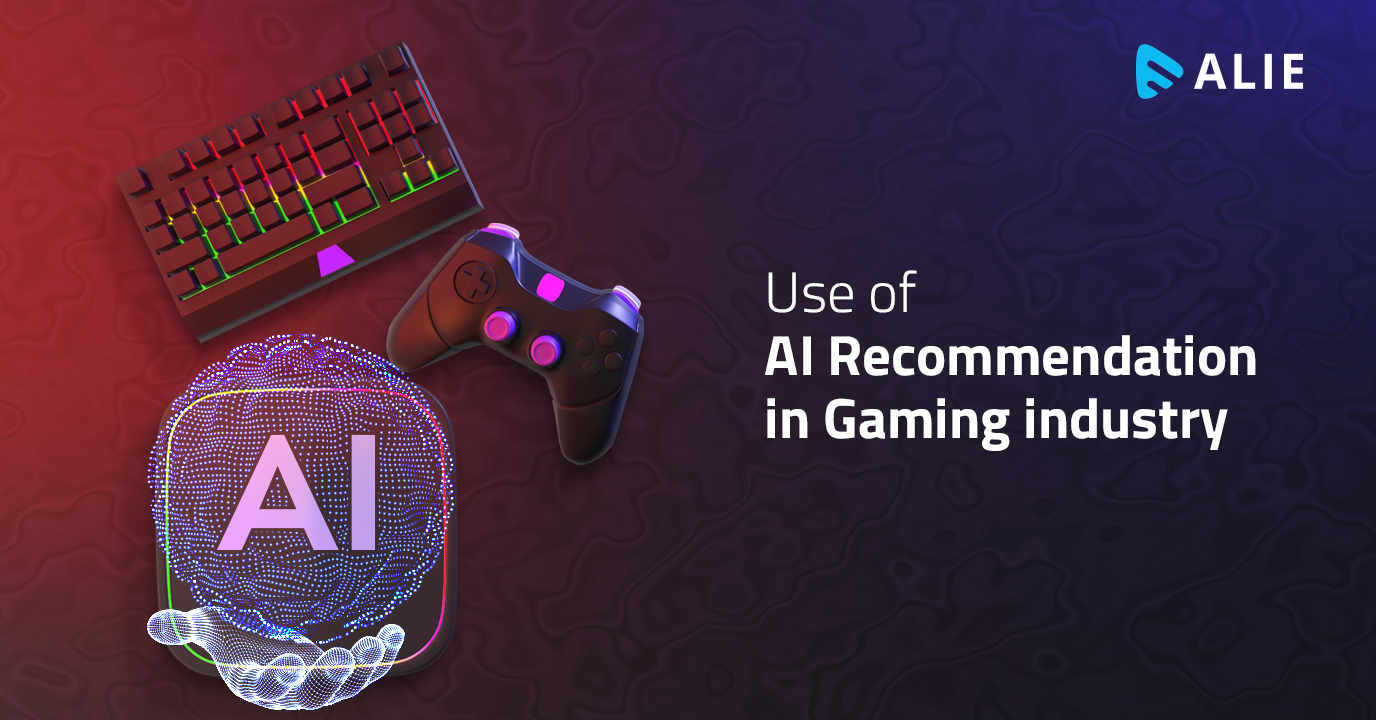

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/ai recg img.jpg",height=500,width=900))

In [ ]:
#datset==>
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df=pd.read_csv("/content/archive (3).zip")
df

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [ ]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [ ]:
df.tail()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1511,1511,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184,184,"['Adventure', 'Puzzle']",Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1.7K,11,239,73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [ ]:
print("raw count: ",df.shape[0])
print("colum count:",df.shape[1])

raw count:  1512
colum count: 14


In [ ]:
df.describe()

,Unnamed: 0,Rating
count,1512.000000,1499.000000
mean,755.500000,3.719346
std,436.621117,0.532608
min,0.000000,0.700000
25%,377.750000,3.400000
50%,755.500000,3.800000
75%,1133.250000,4.100000
max,1511.000000,4.800000


In [ ]:

df.isna().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [ ]:
# #this steps for missing value replace
a=df['Rating'].mode()
a

0    4.1
Name: Rating, dtype: float64

In [ ]:
df['Rating'].fillna("4.1",inplace=True)

In [ ]:
b=df['Team'].mode()
b

0    ['Capcom']
Name: Team, dtype: object

In [ ]:
df['Team'].fillna("Capcom",inplace=True)

In [ ]:
c=df['Summary'].mode()
c

0    Minecraft focuses on allowing the player to ex...
Name: Summary, dtype: object

In [ ]:
df['Summary'].fillna("Minecraft focuses on allowing the player to ex...",inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [ ]:
# selecting the relevant features for recommendation

selected_features = ['Title','Release Date','Rating','Genres','Summary']
print(selected_features)

['Title', 'Release Date', 'Rating', 'Genres', 'Summary']


In [ ]:
# combining all the 5 selected features

combined_features = df['Title'].astype(str) + ' ' + df['Release Date'].astype(str) + ' ' + df['Rating'].astype(str) + ' ' + df['Genres'].astype(str) + ' ' + df['Summary'].astype(str)

In [ ]:
print(combined_features)

0       Elden Ring Feb 25, 2022 4.5 ['Adventure', 'RPG...
1       Hades Dec 10, 2019 4.3 ['Adventure', 'Brawler'...
2       The Legend of Zelda: Breath of the Wild Mar 03...
3       Undertale Sep 15, 2015 4.2 ['Adventure', 'Indi...
4       Hollow Knight Feb 24, 2017 4.4 ['Adventure', '...
                              ...                        
1507    Back to the Future: The Game Dec 22, 2010 3.2 ...
1508    Team Sonic Racing May 21, 2019 2.9 ['Arcade', ...
1509    Dragon's Dogma May 22, 2012 3.7 ['Brawler', 'R...
1510    Baldur's Gate 3 Oct 06, 2020 4.1 ['Adventure',...
1511    The LEGO Movie Videogame Feb 04, 2014 2.8 ['Ad...
Length: 1512, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 1029)	0.09330390689399158
  (0, 5099)	0.13598466538609713
  (0, 4489)	0.03274596735525256
  (0, 5330)	0.14831450462697907
  (0, 501)	0.04952123396672013
  (0, 957)	0.09959591594088527
  (0, 6225)	0.029203796497503803
  (0, 6854)	0.08912147367990522
  (0, 9119)	0.07783891218830782
  (0, 1228)	0.1736413516833384
  (0, 9249)	0.029877284628837587
  (0, 3896)	0.159630585868737
  (0, 1356)	0.05290841900461753
  (0, 3997)	0.16805464003598464
  (0, 931)	0.07187478468627818
  (0, 9011)	0.1736413516833384
  (0, 7629)	0.13096059319123288
  (0, 8501)	0.1422766744329908
  (0, 9986)	0.08706815944823106
  (0, 8622)	0.15628744024759222
  (0, 673)	0.04473024713340392
  (0, 8802)	0.09407431850960613
  (0, 2877)	0.09043948335256237
  (0, 10103)	0.039918489676650994
  (0, 3711)	0.041688693501941584
  :	:
  (1511, 5778)	0.10664588181786169
  (1511, 3390)	0.1260616710298113
  (1511, 4508)	0.10202398029880193
  (1511, 6096)	0.13451285551024847
  (1511, 6719)	0.14751723700988584
  (1511, 1560)	0.0717634

cosine similarity

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.04215988 0.09071964 ... 0.04130101 0.01953118 0.05205618]
 [0.04215988 1.         0.0971383  ... 0.034736   0.02493357 0.02940356]
 [0.09071964 0.0971383  1.         ... 0.08168277 0.05673305 0.06879264]
 ...
 [0.04130101 0.034736   0.08168277 ... 1.         0.05121393 0.01824824]
 [0.01953118 0.02493357 0.05673305 ... 0.05121393 1.         0.02719683]
 [0.05205618 0.02940356 0.06879264 ... 0.01824824 0.02719683 1.        ]]


In [ ]:
print(similarity.shape)

(1512, 1512)


In [ ]:
# getting the movie name from the user

game_name = input(' Enter your favourite game name : ')

 Enter your favourite game name : Dragon's Dogma	


In [ ]:
# creating a list with all the game names given in the dataset

list_of_all_games = df['Title'].tolist()
print(list_of_all_games)

['Elden Ring', 'Hades', 'The Legend of Zelda: Breath of the Wild', 'Undertale', 'Hollow Knight', 'Minecraft', 'Omori', 'Metroid Dread', 'Among Us', 'NieR: Automata', 'Persona 5 Royal', 'Stray', 'God of War', 'Portal 2', 'Bloodborne', 'Celeste', 'Yakuza 0', 'Red Dead Redemption 2', 'Portal', 'Super Mario Odyssey', 'Pokémon Legends: Arceus', 'Hi-Fi Rush', 'Metal Gear Rising: Revengeance', 'Grand Theft Auto V', 'Cyberpunk 2077', 'God of War Ragnarök', 'Xenoblade Chronicles 3', 'Kirby and the Forgotten Land', 'Disco Elysium: The Final Cut', "Marvel's Spider-Man", 'Dark Souls III', 'NieR Replicant ver.1.22474487139...', 'Super Mario 64', 'Super Smash Bros. Ultimate', 'Cuphead', 'Sekiro: Shadows Die Twice', 'Final Fantasy VII', 'Persona 4 Golden', 'Genshin Impact', 'Signalis', 'Resident Evil Village', 'Super Mario Galaxy', 'Fallout: New Vegas', 'Outer Wilds', 'Resident Evil 2', 'Doom', 'Shin Megami Tensei V', 'Bayonetta', 'Stardew Valley', 'The Last of Us Part II', 'Silent Hill 2', 'The Witc

In [ ]:
# finding the close match for the game name given by the user

find_close_match = difflib.get_close_matches(game_name, list_of_all_games)
print(find_close_match)

["Dragon's Dogma", "Dragon's Dogma: Dark Arisen"]


In [ ]:
close_match = find_close_match[0]
print(close_match)

Dragon's Dogma


In [ ]:
# finding the index of the movie with title

id_of_the_games = df[df.Title == close_match]['Unnamed: 0'].values[0]
print(id_of_the_games)

1509


In [ ]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[id_of_the_games]))
print(similarity_score)

[(0, 0.041301007204984155), (1, 0.03473599653410813), (2, 0.08168277484355728), (3, 0.07011036278924362), (4, 0.04625576160797714), (5, 0.07074888155167536), (6, 0.05935731902054117), (7, 0.022840659814033683), (8, 0.04695789972217892), (9, 0.019182057063640116), (10, 0.03793571158286475), (11, 0.015398998098257177), (12, 0.04553314071397194), (13, 0.028382114618089715), (14, 0.05182684496619192), (15, 0.01928121713171679), (16, 0.055478978497230755), (17, 0.026084349772177395), (18, 0.04075658847212198), (19, 0.037965196386370095), (20, 0.03786686298633366), (21, 0.042475993436617385), (22, 0.05930340530059521), (23, 0.05035444223509972), (24, 0.05790502779800157), (25, 0.04241425777239414), (26, 0.03568528945387524), (27, 0.04317623745913962), (28, 0.03304555967408486), (29, 0.04069827499848031), (30, 0.04116914308778047), (31, 0.023829695402324127), (32, 0.026179570599904584), (33, 0.02437359746680223), (34, 0.028977280517296103), (35, 0.06015437158269028), (36, 0.05847484678195854)

In [ ]:
len(similarity_score)

1512

In [ ]:
sorted_similar_games = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_games)

[(1509, 1.0000000000000004), (1052, 0.8291825539578647), (1461, 0.1335014807615249), (1171, 0.12629850279498075), (1320, 0.12528183352466712), (289, 0.12308531443610388), (267, 0.12167016863499558), (554, 0.12167016863499558), (679, 0.11363620530728158), (304, 0.11102271379677382), (1042, 0.11102271379677382), (1397, 0.10267419695483176), (1497, 0.10217523233115136), (63, 0.1010895117958796), (389, 0.1010895117958796), (839, 0.1010895117958796), (226, 0.10088839325494507), (493, 0.10088839325494507), (746, 0.09962499266284065), (749, 0.09879850766611163), (142, 0.09778826681862542), (431, 0.09778826681862542), (897, 0.09778826681862542), (1229, 0.09751993153165665), (198, 0.09686000204286742), (465, 0.09686000204286742), (1478, 0.09629331456035783), (1370, 0.09530206422596603), (163, 0.09512013864043986), (650, 0.09453048831399312), (1234, 0.0943329311068358), (176, 0.09262331209949978), (216, 0.09222474696517309), (483, 0.09222474696517309), (315, 0.09197101474099703), (1232, 0.091944

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_games:
  index = movie[0]
  title_from_index = df[df.index==index]['Title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Dragon's Dogma
2 . Dragon's Dogma: Dark Arisen
3 . Dragon Quest II: Luminaries of the Legendary Line
4 . Higurashi: When They Cry
5 . Dragon Ball: Xenoverse
6 . Mass Effect 3
7 . Middle-earth: Shadow of Mordor
8 . Middle-earth: Shadow of Mordor
9 . LittleBigPlanet
10 . Dragon Age: Origins
11 . Dragon Age: Origins
12 . Bubble Bobble
13 . Dragon Ball GT: Final Bout
14 . Dark Souls
15 . Dark Souls
16 . Dark Souls
17 . Final Fantasy XIV Online
18 . Final Fantasy XIV Online
19 . Like a Dragon Gaiden: The Man Who Erased His Name
20 . Professor Layton and the Unwound Future
21 . Hogwarts Legacy
22 . Hogwarts Legacy
23 . Hogwarts Legacy
24 . Bug Fables: The Everlasting Sapling
25 . Dragon Quest XI S: Echoes of an Elusive Age - Definitive Edition
26 . Dragon Quest XI S: Echoes of an Elusive Age - Definitive Edition
27 . Dragon Age: Origins - Awakening
28 . Dragon Ball Z: Budokai Tenkaichi
29 . God of War
